## Assignment 2
## Objective: Setup an MLOps pipeline that allows for continuous improvement and explainability.
## Tasks: Use the Fashion MNIST dataset for this exercise.

### Team Members
#### 1. Pramit Saha
#### 2. Soumili Saha
#### 3. Shivang Sharma
#### 4. Md Mehran Abul

### Installing dependencies

In [ ]:
!pip install shap -q
!pip install torchvision -q
!pip install ydata-profiling -q
!pip install sweetviz -q
!pip install dtale==3.2.0 -q
!pip install dash==2.11.1 -q

In [ ]:
! pip install --upgrade dash dash-bootstrap-components dash-daq dash-colorscales -q

In [ ]:
!pip install --upgrade dash dtale -q

In [ ]:
!pip install --upgrade sweetviz -q

In [ ]:
!pip install interpret -q

In [ ]:
! pip install --upgrade jupyter ipywidgets -q

### Importing libraries

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import torchvision
import torchvision.transforms as transforms
from ydata_profiling import ProfileReport
import sweetviz as sv
import dtale
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from lime.lime_tabular import LimeTabularExplainer
from interpret import show
from interpret.blackbox import ShapKernel, LimeTabular
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Fashion MNIST dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 26.4M/26.4M [00:02<00:00, 10.8MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29.5k/29.5k [00:00<00:00, 179kB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚

### Convert to Pandas DataFrame

In [3]:
train_data = []
train_labels = []
for image, label in train_dataset:
    train_data.append(image.view(-1).numpy())  # Flatten image
    train_labels.append(label)

In [4]:
df = pd.DataFrame(train_data)
df['label'] = train_labels

## M1: Exploratory Data Analysis (EDA)

### EDA report using Sweetviz

In [6]:
sweetviz_report = sv.analyze(df, pairwise_analysis="off")
sweetviz_report.show_html("../reports/fashion_mnist_sweetviz.html")

                                             |                                                                ‚Ä¶

Report ../reports/fashion_mnist_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### EDA report using D-Tale

In [7]:
d = dtale.show(df)
print("D-Tale is running... Open the following link to interact with the data:")
print(d._main_url)

D-Tale is running... Open the following link to interact with the data:
http://localhost:40000/dtale/main/1


### EDA report using Pandas Profiling

In [8]:
profile = ProfileReport(df.sample(n=5000, random_state=42), 
                        title="Fashion MNIST EDA Report", 
                        minimal=True)
profile.to_file("../reports/fashion_mnist_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

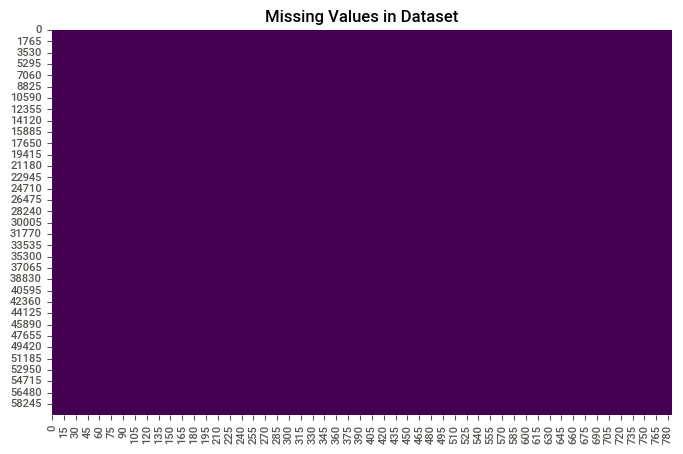

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Dataset")
plt.show()

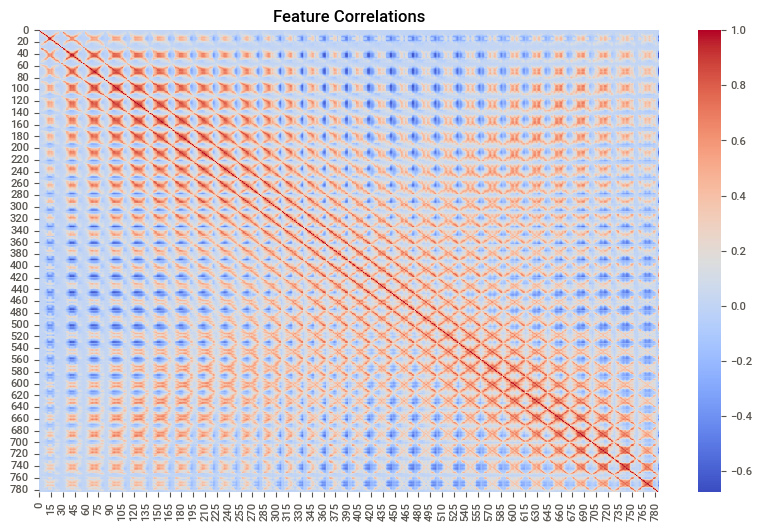

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()

2025-03-23 14:33:36,855 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-23 14:33:36,883 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


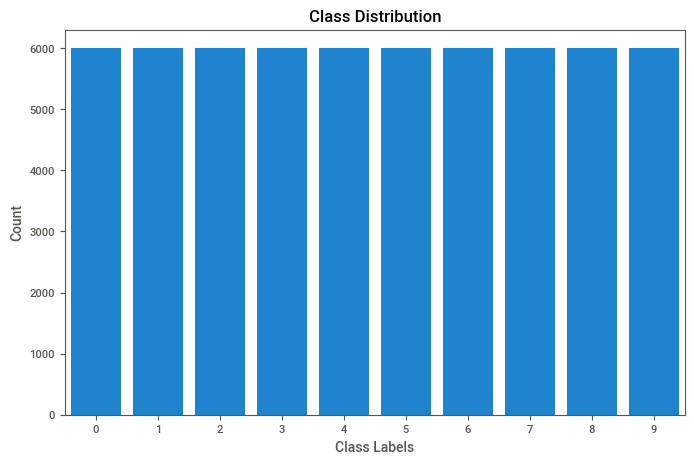

In [13]:
# Plot class distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["label"])
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

### M2: Feature Engineering & Explainability

In [14]:
X = df.drop(columns=['label']).values

In [15]:
# Normalize pixel values to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
print("Feature Shape After Normalization:", X_scaled.shape)  # Expected: (60000, 784)

Feature Shape After Normalization: (60000, 784)


In [17]:
# Compute mean & std deviation for each image
mean_pixel = np.mean(X_scaled, axis=1, keepdims=True)
std_pixel = np.std(X_scaled, axis=1, keepdims=True)

In [18]:
# Append to dataset
X_features = np.hstack((X_scaled, mean_pixel, std_pixel))

print("Feature Shape After Adding Mean & Std:", X_features.shape)  # Expected: (60000, 786)

Feature Shape After Adding Mean & Std: (60000, 786)


In [19]:
# Apply PCA transformation
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_features)
print("Feature Shape After PCA:", X_pca.shape)  # Expected: (60000, 188)

Feature Shape After PCA: (60000, 188)


In [20]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(df['label'].values, dtype=torch.long)

In [21]:

# Create DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [22]:
# Define model class
class FashionMNISTClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super(FashionMNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:
#Ensure input_dim matches PCA output
input_dim = X_pca.shape[1]  
model = FashionMNISTClassifier(input_dim=input_dim)

In [24]:
# Define optimizer & loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [25]:
epochs = 10

for epoch in range(epochs):
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.1263
Epoch [2/10], Loss: 0.2185
Epoch [3/10], Loss: 0.2804
Epoch [4/10], Loss: 0.2090
Epoch [5/10], Loss: 0.1919
Epoch [6/10], Loss: 0.3478
Epoch [7/10], Loss: 0.1018
Epoch [8/10], Loss: 0.2668
Epoch [9/10], Loss: 0.2047
Epoch [10/10], Loss: 0.1477


In [26]:
def model_wrapper(x_np):
    x_tensor = torch.tensor(x_np, dtype=torch.float32)
    with torch.no_grad():
        return model(x_tensor).numpy()  # Ensure correct shape

/var/folders/vj/s0s5b0t509bc_00yt9zyp5140000gr/T/ipykernel_18588/1082095600.py:8: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



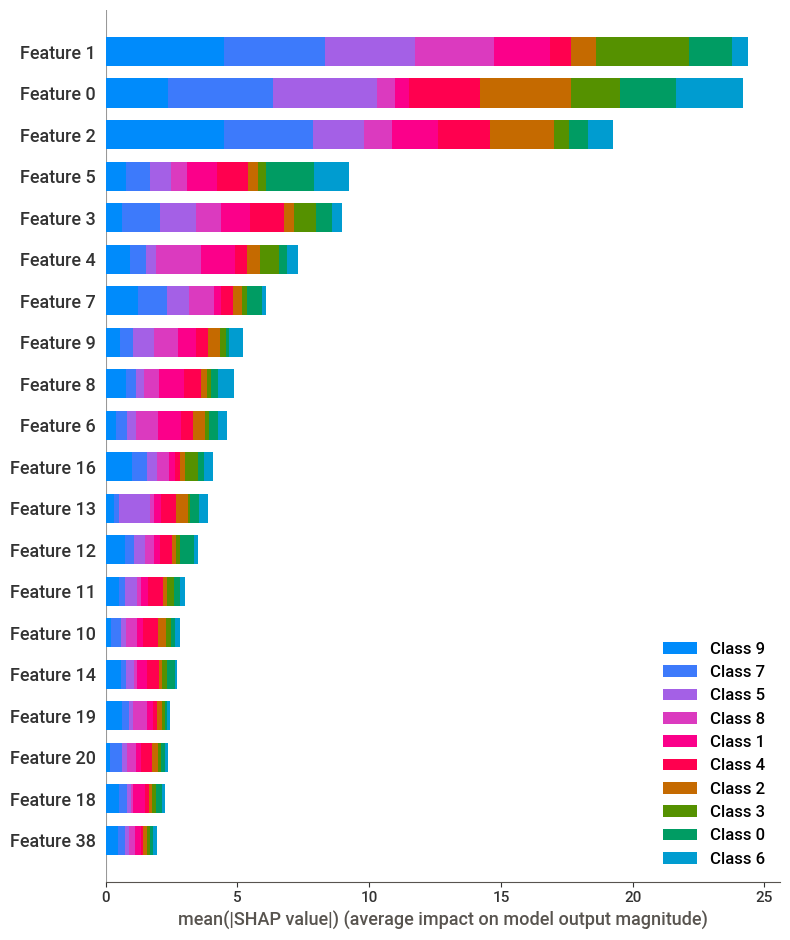

In [27]:
# Initialize SHAP Explainer using KernelExplainer (supports deep learning models)
explainer = shap.Explainer(model_wrapper, X_train_tensor.numpy())

# Explain 100 samples
shap_values = explainer(X_train_tensor[:100].numpy())

# Summary plot
shap.summary_plot(shap_values, X_train_tensor[:100].numpy())

In [28]:
X_pca = np.array(X_pca, dtype=np.float64)  # Ensure correct data type
lime_explainer = LimeTabularExplainer(
    X_pca, 
    feature_names=[f'pc_{i}' for i in range(X_pca.shape[1])],  
    class_names=[str(i) for i in range(10)], 
    mode="classification"
)

In [29]:
# Select a sample
sample_idx = 10
sample_original = np.array(train_data[sample_idx])  # Convert to NumPy array

# Compute mean & std deviation
mean_pixel = np.mean(sample_original).reshape(1, -1)  
std_pixel = np.std(sample_original).reshape(1, -1)

# Append mean & std dev to match X_features (shape = 786)
sample_extended = np.hstack((sample_original.reshape(1, -1), mean_pixel, std_pixel))

# Now apply PCA
sample_pca = pca.transform(sample_extended).flatten()

In [30]:
lime_exp = lime_explainer.explain_instance(sample_pca, model_wrapper, num_features=10)
lime_exp.show_in_notebook()

/Users/mdmehran/anaconda3/envs/mlops/lib/python3.10/site-packages/lime/lime_tabular.py:372: UserWarning:


                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    



  0%|          | 0/10 [00:00<?, ?it/s]

2025-03-23 14:35:42,535 - INFO     - num_full_subsets = 1
2025-03-23 14:35:42,542 - INFO     - remaining_weight_vector = array([0.10493071, 0.07033193, 0.05303563, 0.04266035, 0.03574563,
       0.03080838, 0.0271071 , 0.02422981, 0.02192934, 0.02004839,
       0.01848211, 0.0171579 , 0.0160239 , 0.01504209, 0.01418395,
       0.01342767, 0.01275628, 0.01215641, 0.01161733, 0.01113037,
       0.01068845, 0.0102857 , 0.00991723, 0.00957895, 0.00926738,
       0.00897958, 0.008713  , 0.00846546, 0.00823507, 0.00802018,
       0.00781936, 0.00763132, 0.00745497, 0.0072893 , 0.00713345,
       0.00698662, 0.00684811, 0.0067173 , 0.00659362, 0.00647656,
       0.00636566, 0.0062605 , 0.0061607 , 0.00606592, 0.00597585,
       0.00589018, 0.00580866, 0.00573106, 0.00565713, 0.00558669,
       0.00551955, 0.00545552, 0.00539445, 0.00533619, 0.0052806 ,
       0.00522756, 0.00517695, 0.00512866, 0.00508258, 0.00503862,
       0.0049967 , 0.00495673, 0.00491863, 0.00488233, 0.00484777,
       0

<Figure size 640x480 with 0 Axes>

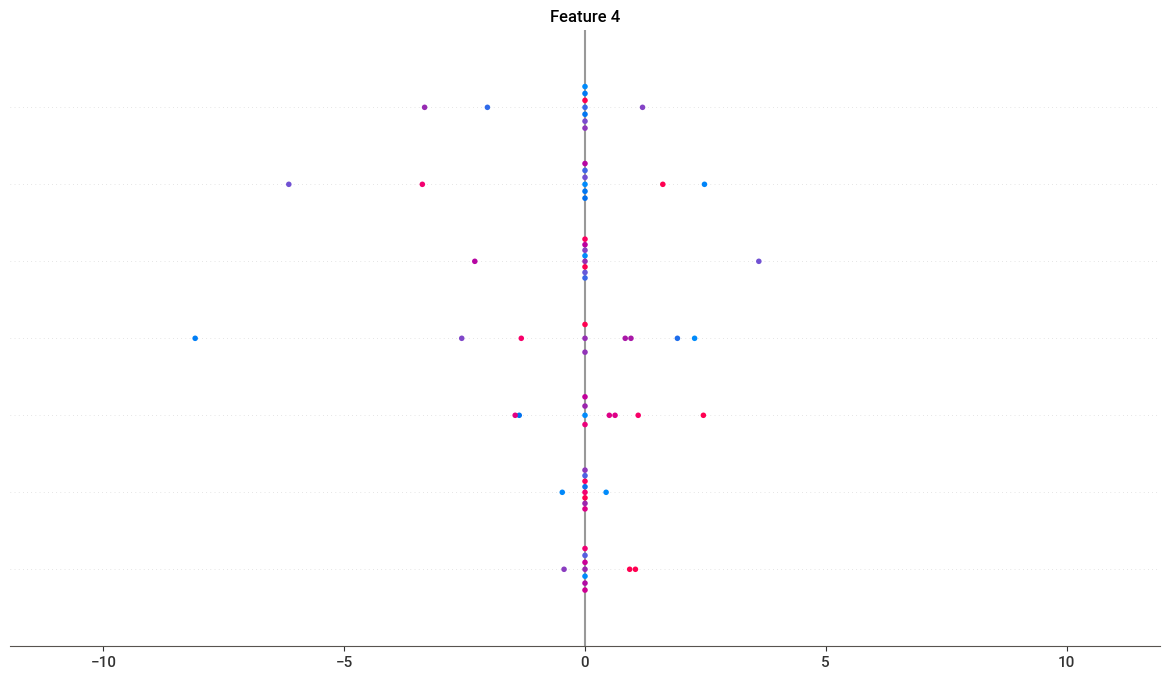

In [31]:
import shap

# Define SHAP Kernel Explainer
explainer = shap.KernelExplainer(model_wrapper, X_train_tensor[:100].numpy())

# Get SHAP values for a few test samples
shap_values = explainer.shap_values(X_train_tensor[:10].numpy())

# Visualize results
shap.summary_plot(shap_values, X_train_tensor[:10].numpy())

## M3: Model Selection & Hyperparameter Optimization

In [8]:
# Install dependencies
!pip install -q optuna tpot

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import optuna
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [9]:
# üìå Data Transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1).numpy())  # Flatten images
])

# üìå Load Dataset
train_dataset = datasets.FashionMNIST(root="../data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="../data", train=False, download=True, transform=transform)

# Convert to NumPy arrays for TPOT
X_train_full = np.array([train_dataset[i][0] for i in range(len(train_dataset))])
y_train_full = np.array([train_dataset[i][1] for i in range(len(train_dataset))])

# Split into Train & Validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [10]:
# ========================= üîπ TPOT AutoML Model Selection üîπ ========================= #
def run_tpot():
    """Run TPOT AutoML to find the best model."""
    tpot = TPOTClassifier(generations=2, population_size=10, verbose=2, n_jobs=2)
    tpot.fit(X_train, y_train)

    if hasattr(tpot, "fitted_pipeline_"):
        best_pipeline = tpot.fitted_pipeline_
        print("\nBest TPOT Pipeline:\n", best_pipeline)
    else:
        print("No trained pipeline found.")
    return tpot

In [11]:
# ========================= üîπ Define PyTorch Model üîπ ========================= #
class FashionMNISTClassifier(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=10):
        super(FashionMNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

In [12]:
# ========================= üîπ Train & Evaluate Function üîπ ========================= #
def train_and_evaluate(model, optimizer, criterion, epochs=3, batch_size=64):
    """Trains and evaluates the model, returning accuracy."""
    # ‚úÖ Use only 20% of the training data for PyTorch
    subset_size_pytorch = int(0.2 * len(train_dataset))  # 20% of the data
    subset_indices_pytorch = np.random.choice(len(train_dataset), subset_size_pytorch, replace=False)
    train_subset = Subset(train_dataset, subset_indices_pytorch)
    
    train_size = int(0.8 * len(train_subset))
    val_size = len(train_subset) - train_size
    train_ds, val_ds = random_split(train_subset, [train_size, val_size])

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion.to(device)

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [13]:
# ========================= üîπ Optuna Hyperparameter Optimization üîπ ========================= #
def objective(trial):
    """Objective function for Optuna optimization."""
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    hidden_dim = trial.suggest_int("hidden_dim", 64, 256, step=32)

    model = FashionMNISTClassifier(hidden_dim=hidden_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    accuracy = train_and_evaluate(model, optimizer, criterion)  
    return accuracy  # Optuna maximizes accuracy


def run_optuna():
    """Runs Optuna optimization."""
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=5)

    print("\nüéØ Best Hyperparameters:", study.best_params)
    return study.best_params

In [ ]:
# ========================= üîπ Run Experiments üîπ ========================= #
if __name__ == "__main__":
    print("\nüöÄ Running TPOT AutoML...")
    tpot_model = run_tpot()

    print("\nüîç Running Optuna Hyperparameter Tuning...")
    best_hyperparams = run_optuna()


üöÄ Running TPOT AutoML...


/Users/mdmehran/anaconda3/envs/mlops/lib/python3.10/site-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation:   0%|                                                                                                                                           | 0/2 [00:00<?, ?it/s]

## M4

In [ ]:
! pip install mlflow -q

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score
import subprocess
import webbrowser
from IPython.display import IFrame

# Set the experiment name
mlflow.set_experiment("fashion_mnist_experiment")

# Start an MLflow run
with mlflow.start_run():
    # Train the TPOT model
    tpot.fit(X_train, y_train)

    # Predict & evaluate
    y_pred = tpot.fitted_pipeline_.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Log parameters and metrics
    mlflow.log_param("generations", 5)
    mlflow.log_param("population_size", 20)
    mlflow.log_metric("accuracy", accuracy)

    # Log the best model
    mlflow.sklearn.log_model(tpot.fitted_pipeline_, "best_model")

    print(f"Validation Accuracy: {accuracy:.4f}")

# Start MLflow UI as a background process
subprocess.Popen(["mlflow", "ui", "--port", "5000", "--host", "0.0.0.0"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

# Open MLflow UI in a new browser tab
webbrowser.open("http://localhost:5000")

# Display MLflow UI inside Jupyter Notebook
IFrame(src="http://localhost:5000", width=1000, height=600)

In [ ]:
!pip install evidently

In [ ]:
import pandas as pd
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# Assign generic column names
feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_val_df = pd.DataFrame(X_val, columns=feature_names)

# Create and run the drift report
drift_report = Report(metrics=[DataDriftPreset()])
drift_report.run(reference_data=X_train_df, current_data=X_val_df)

# Save the report
drift_report.save_html("../reports/drift_report.html")